In [ ]:
# IMPORT PACKAGES

import pandas as pd
import numpy as np
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.preprocessing import LabelEncoder

In [ ]:
# IMPORT DATA ASURANSI
df = pd.read_csv('insurance.csv')

# Pilih kolom sesuai urutan [Usia, Jenis Kelamin, Perokok, Jumlah Anak, Body Mass Index, Premi Bersih(Biaya)]
desired_columns = ['age', 'sex', 'smoker', 'children', 'bmi', 'charges']
df_reordered = df[desired_columns]
data = df_reordered.to_numpy(dtype=object)

# Tampilkan Data
print(data)

[[19 'female' 'yes' 0 27.9 16884.924]
 [18 'male' 'no' 1 33.77 1725.5523]
 [28 'male' 'no' 3 33.0 4449.462]
 ...
 [18 'female' 'no' 0 36.85 1629.8335]
 [21 'female' 'no' 0 25.8 2007.945]
 [61 'female' 'yes' 0 29.07 29141.3603]]


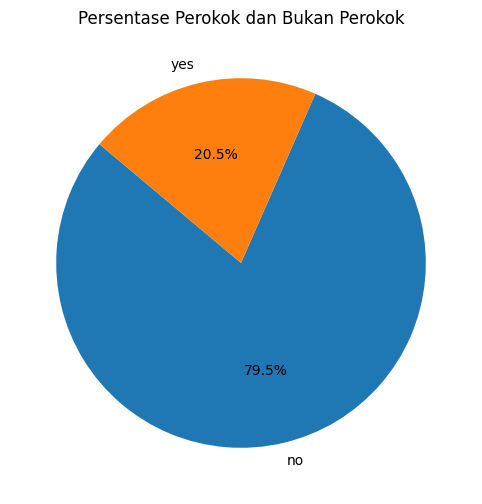

In [ ]:
#Persentase Perokok dan Bukan Perokok
#Menghitung jumlah perokok dan bukan perokok
smoker_counts = df['smoker'].value_counts()
#Membuat Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Perokok dan Bukan Perokok')
plt.show()

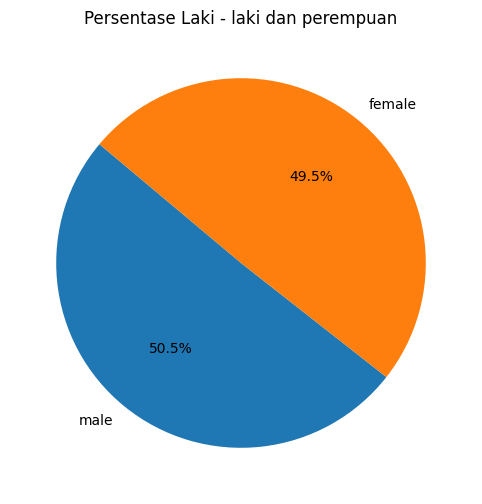

In [ ]:
#Persentase Laki-laki dan Perempuan
#Menghitung Laki-laki dan perempuan
sex_counts = df['sex'].value_counts()
#Membuat Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Laki - laki dan perempuan')
plt.show()

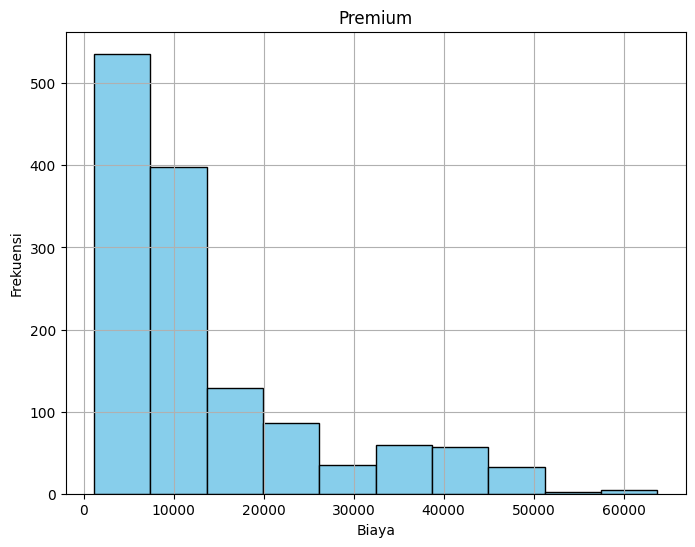

In [ ]:
# Distribusi Premi
data1 = df['charges']

plt.figure(figsize=(8, 6))
plt.hist(data1, bins=10, color='skyblue', edgecolor='black')
plt.title('Premium')
plt.xlabel('Biaya')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

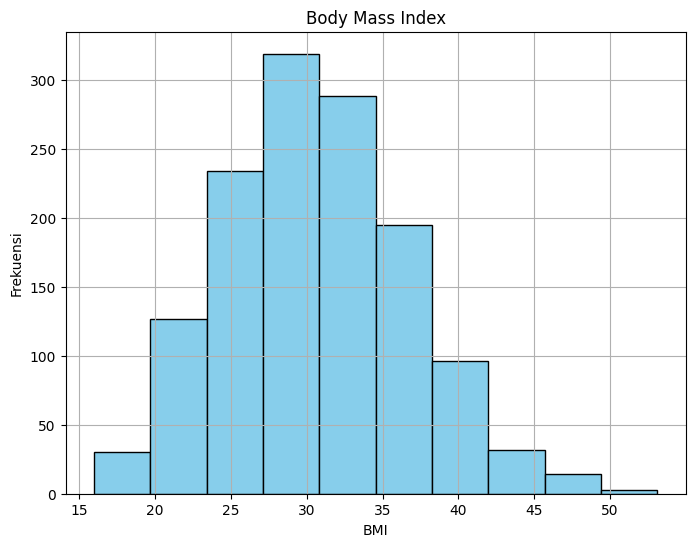

In [ ]:
#Distribusi BMI
data2 = df['bmi']

plt.figure(figsize=(8, 6))
plt.hist(data2, bins=10, color='skyblue', edgecolor='black')
plt.title('Body Mass Index')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

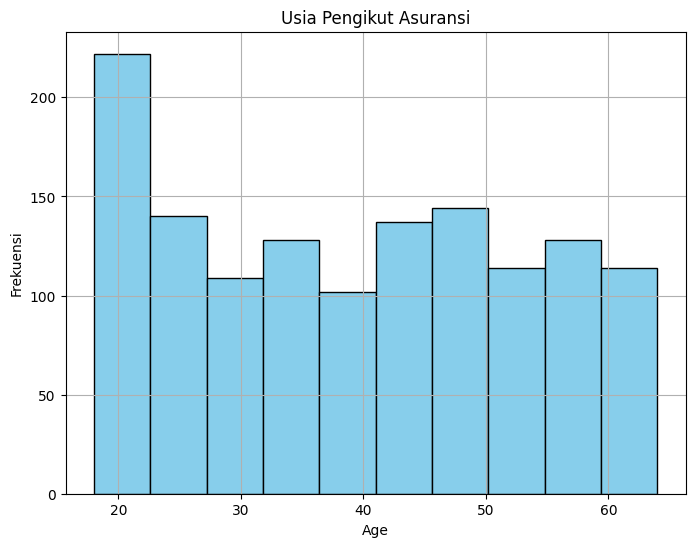

In [ ]:
# Distribusi Usia
data3 = df['age']

plt.figure(figsize=(8, 6))
plt.hist(data3, bins=10, color='skyblue', edgecolor='black')
plt.title('Usia Pengikut Asuransi')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

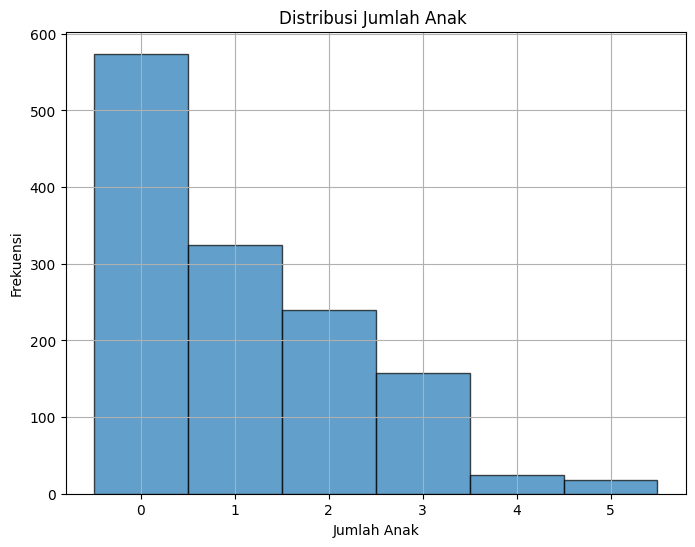

In [ ]:
# Distribusi Jumlah Anak
children = data[:, 3].astype(int)

# Plot histogram of the number of children
plt.figure(figsize=(8, 6))
plt.hist(children, bins=np.arange(children.min(), children.max() + 2) - 0.5, edgecolor='k', alpha=0.7)
plt.xlabel('Jumlah Anak')
plt.ylabel('Frekuensi')
plt.title('Distribusi Jumlah Anak ')
plt.xticks(np.arange(children.min(), children.max() + 1))
plt.grid(True)
plt.show()

In [ ]:
# PREPROCESSING DATA

# Pisahkan fitur (variabel independen) and label (variabel dependen)
features = data[:, :-1]
labels = data[:, -1].astype(float)

# Ubah Variabel Kategori menjadi numerik
gender_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
smoker_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_gender = gender_encoder.fit_transform(features[:, 1].reshape(-1, 1))
encoded_smoker = smoker_encoder.fit_transform(features[:, 2].reshape(-1, 1))

# Penyesuaian Skala Nilai Numerik
age_scaler = MinMaxScaler()
bmi_scaler = MinMaxScaler()
normalized_age = age_scaler.fit_transform(features[:, 0].reshape(-1, 1).astype(float))
normalized_bmi = bmi_scaler.fit_transform(features[:, 4].reshape(-1, 1).astype(float))
children = features[:, 3].astype(float).reshape(-1, 1)

# Gabungkan Semua Variabel yang telah di persiapkan (Preprocessed)
preprocessed_features = np.concatenate([
    normalized_age,
    encoded_gender,
    encoded_smoker,
    children,
    normalized_bmi
], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# DEFINISIKAN MODEL ANN
num_inputs = preprocessed_features.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_inputs, activation='sigmoid', input_shape=(preprocessed_features.shape[1],)),
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

In [ ]:
# COMPILE DATANYA DAN LATIH DATANYA
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Latih datanya
model.fit(preprocessed_features, labels, epochs=100, batch_size=4, verbose=1)

Epoch 1/100
335/335 [==============================] - 1s 2ms/step - loss: 322570848.0000 - mae: 13267.5840
Epoch 2/100
335/335 [==============================] - 1s 2ms/step - loss: 322485792.0000 - mae: 13264.3828
Epoch 3/100
335/335 [==============================] - 1s 2ms/step - loss: 322419168.0000 - mae: 13261.8477
Epoch 4/100
335/335 [==============================] - 1s 2ms/step - loss: 322355488.0000 - mae: 13259.4316
Epoch 5/100
335/335 [==============================] - 1s 2ms/step - loss: 322275040.0000 - mae: 13256.4375
Epoch 6/100
335/335 [==============================] - 1s 2ms/step - loss: 322202016.0000 - mae: 13253.6709
Epoch 7/100
335/335 [==============================] - 1s 3ms/step - loss: 322133280.0000 - mae: 13251.0732
Epoch 8/100
335/335 [==============================] - 1s 3ms/step - loss: 322066464.0000 - mae: 13248.5439
Epoch 9/100
335/335 [==============================] - 1s 3ms/step - loss: 322000384.0000 - mae: 13246.0420
Epoch 10/100
335/335 [======

In [ ]:
# Fungsi untuk mempersiapkan (preprocess) data baru
def preprocess_new_data(new_data):
    new_encoded_gender = gender_encoder.transform(new_data[:, 1].reshape(-1, 1))
    new_encoded_smoker = smoker_encoder.transform(new_data[:, 2].reshape(-1, 1))
    new_normalized_age = age_scaler.transform(new_data[:, 0].reshape(-1, 1).astype(float))
    new_normalized_bmi = bmi_scaler.transform(new_data[:, 4].reshape(-1, 1).astype(float))
    new_children = new_data[:, 3].astype(float).reshape(-1, 1)

    new_preprocessed_features = np.concatenate([
        new_normalized_age,
        new_encoded_gender,
        new_encoded_smoker,
        new_children,
        new_normalized_bmi
    ], axis=1)

    return new_preprocessed_features

In [ ]:
# Fungsi untuk memprediksi premi
def predict_premium(new_data):
    new_preprocessed_features = preprocess_new_data(new_data)
    predictions = model.predict(new_preprocessed_features)
    return predictions

In [ ]:
# Memprediksi Premi dengan data baru
new_data = np.array([
    [19, 'male', 'yes', 0, 38.89]
], dtype=object)

predicted_premium = predict_premium(new_data)
print("Maka premi yang diprediksi adalah sebesar $", predicted_premium[0][0])

1/1 [==============================] - 0s 21ms/step
Maka premi yang diprediksi adalah sebesar $ 28957.986


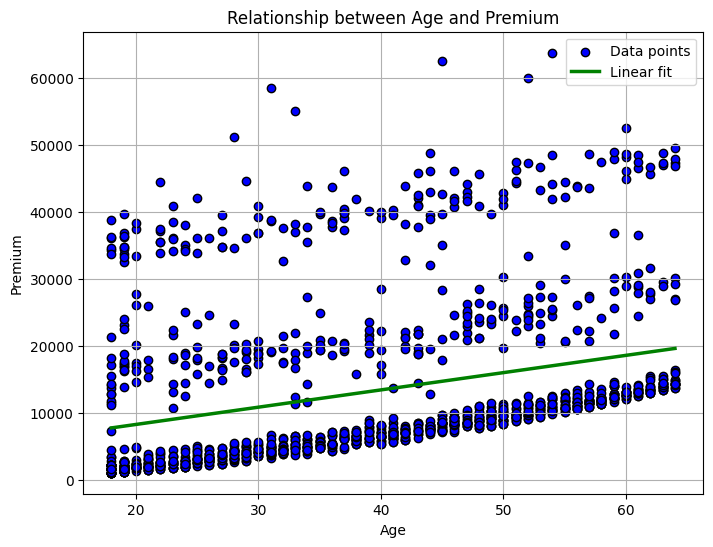

In [ ]:
# VISUALISASI HUBUNGAN ANTARA USIA DAN PREMI
features = data[:, :-1]
labels = data[:, -1].astype(float)
age = features[:, 0].astype(float)
premium = labels

# Membuat Garis Regresi Linear
coefficients = np.polyfit(age, premium, 1)
linear_fit = np.poly1d(coefficients)
age_line = np.linspace(age.min(), age.max(), 100)
premium_line = linear_fit(age_line)

# Membuat Plot Dengan Garis Regresi
plt.figure(figsize=(8, 6))
plt.scatter(age, premium, c='blue', marker='o', edgecolor='k', label='Data points')
plt.plot(age_line, premium_line, color='green', linewidth=2.5, label='Linear fit')
plt.xlabel('Age')
plt.ylabel('Premium')
plt.title('Relationship between Age and Premium')
plt.legend()
plt.grid(True)
plt.show()

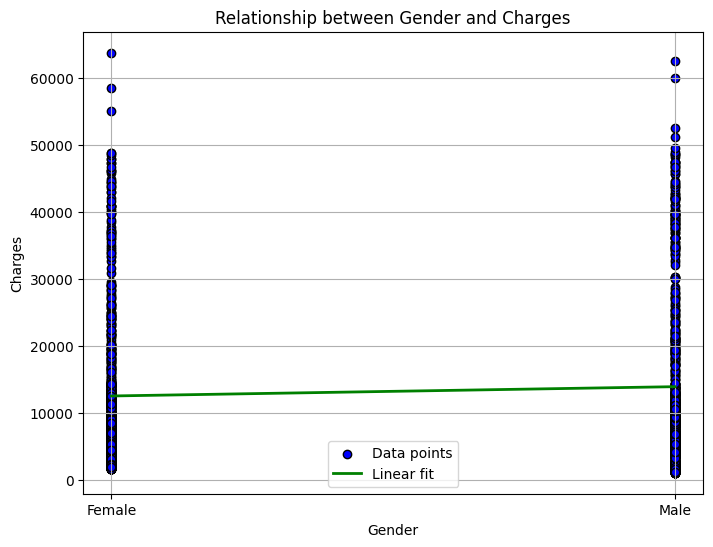

In [ ]:
# VISUALISASI HUBUNGAN ANTARA JENIS KELAMIN DAN PREMI
gender = data[:, 1]
charges = data[:, 5].astype(float)

# Merubah menjadi data Numerik
gender_numeric = LabelEncoder().fit_transform(gender)

# Membuat Garis Regresi Linear
slope, intercept, _, _, _ = linregress(gender_numeric, charges)
gender_line = np.linspace(gender_numeric.min(), gender_numeric.max(), 100)
charges_line = slope * gender_line + intercept

# Membuat Plot Dengan Garis Regresi
plt.figure(figsize=(8, 6))
plt.scatter(gender_numeric, charges, c='blue', marker='o', edgecolor='k', label='Data points')
plt.plot(gender_line, charges_line, color='green', linewidth=2, label='Linear fit')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Relationship between Gender and Charges')
plt.legend()
plt.grid(True)
plt.show()

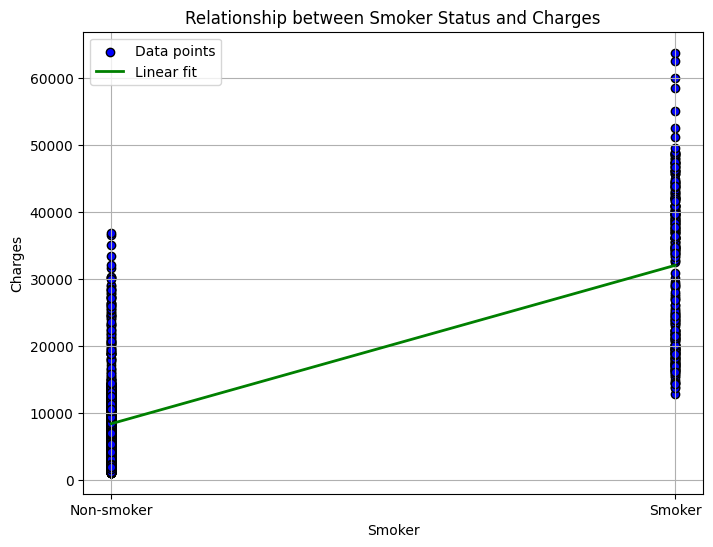

In [ ]:
# VISUALISASI HUBUNGAN ANTARA STATUS PEROKOK DAN PREMI
smoker = data[:, 2]
charges = data[:, 5].astype(float)

# Merubah menjadi data Numerik
smoker_numeric = LabelEncoder().fit_transform(smoker)

# Membuat garis Regresi Linear
slope, intercept, _, _, _ = linregress(smoker_numeric, charges)
smoker_line = np.linspace(smoker_numeric.min(), smoker_numeric.max(), 100)
charges_line = slope * smoker_line + intercept

# Membuat Plot Dengan Garis Regresi
plt.figure(figsize=(8, 6))
plt.scatter(smoker_numeric, charges, c='blue', marker='o', edgecolor='k', label='Data points')
plt.plot(smoker_line, charges_line, color='green', linewidth=2, label='Linear fit')
plt.xticks([0, 1], ['Non-smoker', 'Smoker'])
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Relationship between Smoker Status and Charges')
plt.legend()
plt.grid(True)
plt.show()

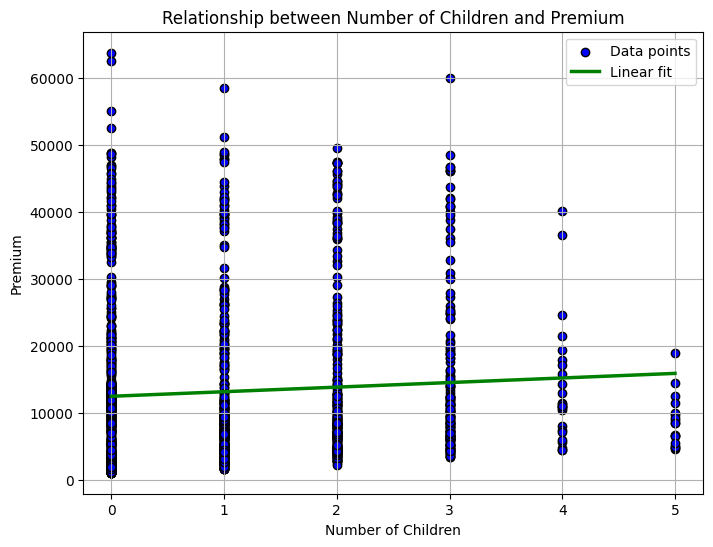

In [ ]:
# VISUALISASI HUBUNGAN ANTARA JUMLAH ANAK DAN PREMI
children = features[:, 3].astype(float)
premium = labels

# Membuat Garis Regresi Linear
coefficients = np.polyfit(children, premium, 1)
linear_fit = np.poly1d(coefficients)
children_line = np.linspace(children.min(), children.max(), 100)
premium_line = linear_fit(children_line)

# Membuat Plot Dengan Garis Regresi
plt.figure(figsize=(8, 6))
plt.scatter(children, premium, c='blue', marker='o', edgecolor='k', label='Data points')
plt.plot(children_line, premium_line, color='green', linewidth=2.5, label='Linear fit')
plt.xlabel('Number of Children')
plt.ylabel('Premium')
plt.title('Relationship between Number of Children and Premium')
plt.legend()
plt.grid(True)
plt.show()

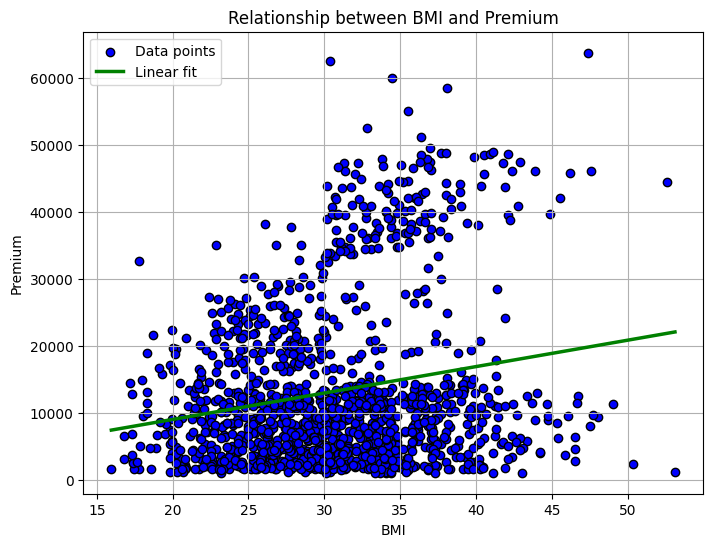

In [ ]:
# VISUALISASI HUBUNGAN ANTARA BMI DAN PREMI
bmi = features[:, 4].astype(float)
premium = labels

# Membuat Garis Regresi Linear
coefficients = np.polyfit(bmi, premium, 1)
linear_fit = np.poly1d(coefficients)
bmi_line = np.linspace(bmi.min(), bmi.max(), 100)
premium_line = linear_fit(bmi_line)

# Membuat Plot Dengan Garis Regresi
plt.figure(figsize=(8, 6))
plt.scatter(bmi, premium, c='blue', marker='o', edgecolor='k', label='Data points')
plt.plot(bmi_line, premium_line, color='green', linewidth=2.5, label='Linear fit')
plt.xlabel('BMI')
plt.ylabel('Premium')
plt.title('Relationship between BMI and Premium')
plt.legend()
plt.grid(True)
plt.show()